In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from datetime import datetime, date, time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/albertw/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
def dateparse(x):
    return datetime.combine(d, datetime.strptime(x, '%H:%M:%S').time())

files = !ls event*
dflist=[]
for filename in files:
    d = datetime.strptime(filename[9:17], '%Y%m%d')
    dflist.append(pd.read_csv(filename, 
                 parse_dates=['Time'], 
                 names = ["Time", "Hour Event", "Doppler", "x", "y", "Duration"],
                 date_parser=dateparse,
                index_col="Time"))
df=pd.concat(dflist)
daterangestr=str(df.index.date.min())+' to ' + str(df.index.date.max()) +'.'

In [5]:
def plot_counts_by_hour(df):
    """ Plot a histogram of the counts per hour"""
    fig, ax = plt.subplots()
    ax.set_title('Histogram of Meteor counts by hour.')
    ax.set_xlabel('Hour of Day (half hour bins)')
    ax.set_ylabel('Number of counts')
    ax.set_xticks(range(0,24), minor=False)
    ax.set_xticklabels(range(0,24), minor=False)
    df['Hour'] = df.index.hour + df.index.minute/60.0
    df.hist("Hour", bins=47, ax=ax)
    plt.title('Histogram of Meteor counts by hour from ' + daterangestr)


In [ ]:
def plot_durations(df):
    """ Plot a histogram of meteor durations"""
    fig, ax = plt.subplots()
    ax.set_title('Histogram of Meteor Durations.')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Number of counts (log10)')
    ax.set_yscale('log')
    df.hist("Duration", ax=ax, bins=50)
    plt.title('Histogram of Meteor Durations ' + daterangestr)


In [6]:
def plot_heatmap(df):
    """ Plot a heatmap of counts per hour per day."""
    df["Date"] = df.index.date
    df["Hour"] = df.index.hour

    df2 = pd.DataFrame(df.Date.unique(),columns=["Date"])
    heatdata = {}
    for d in df2["Date"]:
        c2 = df[df["Date"] == d]
        heatdata[d]=[]
        count =  Counter(c2["Hour"])
        daydata = []
        for hour in range(0,24):
            daydata.append(count[hour])
        heatdata[d]=daydata


    df3 = pd.DataFrame(data=heatdata).T

    fig, ax = plt.subplots()

    heatmap = ax.pcolor(df3)
    cbar = fig.colorbar(heatmap)
    
    fig = plt.gcf()
    
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(df3.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(df3.shape[1]) + 0.5, minor=False)

    ax.set_xticklabels(range(0,24), minor=False)
    ax.set_yticklabels(df3.index, minor=False)

    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    ax.set_title('Heatmap of Meteor counts by hour over time.')
    ax.set_xlabel('Hour of Day.')
    ax.set_ylabel('Date.')
    cbar.ax.set_title('# Meteors.')


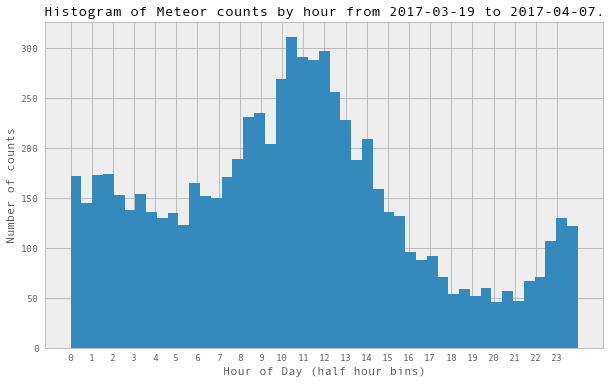

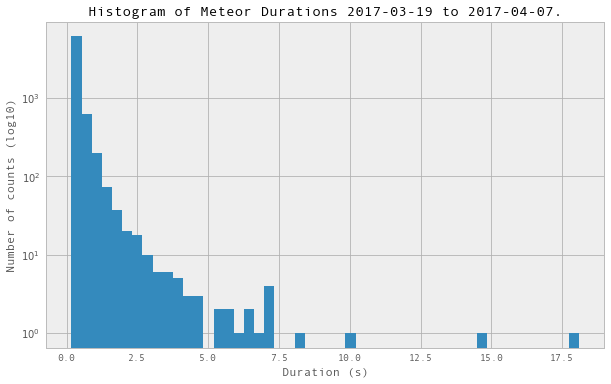

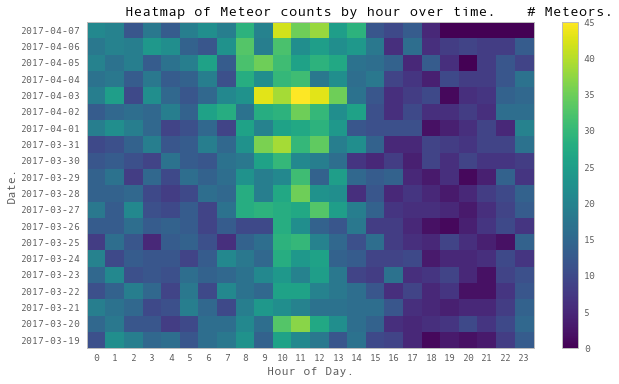

In [9]:
plot_counts_by_hour(df)
plot_durations(df)
plot_heatmap(df)